In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

from sklearn.manifold import TSNE
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.datasets import load_digits, load_iris, load_breast_cancer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale


%matplotlib inline

In [276]:
data_dict = load_digits()

X = scale(data_dict['data'])
y = data_dict['target']

print(X.shape)

(1797, 64)


In [278]:
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, train_size=100)

print(
    "labeled_size = {labeled_size}, unlabeled_size = {unlabeled_size}".format(
        labeled_size=y_labeled.shape[0], 
        unlabeled_size=y_unlabeled.shape[0]
    )
)

labeled_size = 100, unlabeled_size = 1697


In [279]:
X = np.vstack((X_labeled, X_unlabeled))
y = np.hstack((y_labeled, - np.ones_like(y_unlabeled)))

In [286]:
label_propagation = LabelPropagation(alpha=1, gamma=0.23, max_iter=30)
label_propagation = LabelSpreading(alpha=1, gamma=0.4, max_iter=50)

label_propagation.fit(X, y)

LabelSpreading(alpha=1, gamma=0.4, kernel='rbf', max_iter=50, n_neighbors=7,
        tol=0.001)

In [287]:
from sklearn.metrics import accuracy_score, log_loss

most_likely_class_predictions = label_propagation.label_distributions_[y == -1].argmax(axis=1)

print("accuracy =", accuracy_score(y_unlabeled, most_likely_class_predictions))

accuracy = 0.951090159104


In [291]:
X_proj = TSNE(perplexity=35, learning_rate=1000, init='pca', random_state=45, verbose=2).fit_transform(X)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 2.463630
[t-SNE] Iteration 25: error = 1.3054208, gradient norm = 0.0065899
[t-SNE] Iteration 50: error = 1.2611512, gradient norm = 0.0079760
[t-SNE] Iteration 75: error = 1.0170581, gradient norm = 0.0015606
[t-SNE] Iteration 100: error = 0.9735828, gradient norm = 0.0023969
[t-SNE] Error after 100 iterations with early exaggeration: 0.973583
[t-SNE] Iteration 125: error = 0.9052683, gradient norm = 0.0008596
[t-SNE] Iteration 125: gradient norm 0.000860. Finished.
[t-SNE] Error after 125 iterations: 0.905268


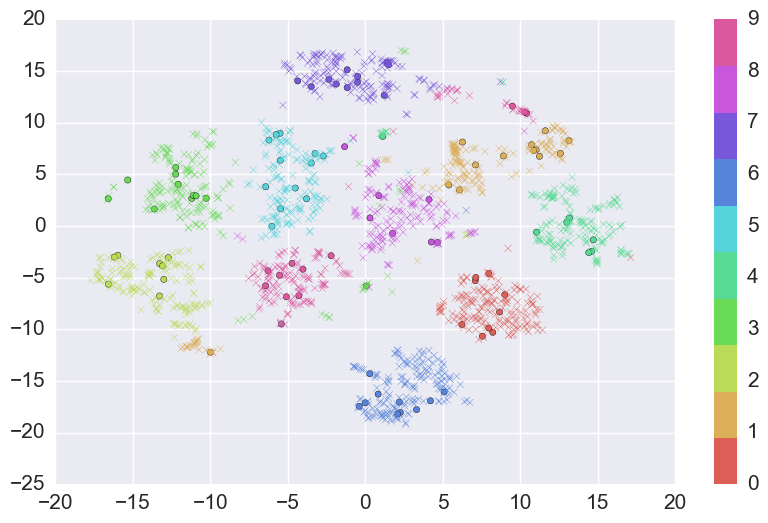

In [292]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 6))

plt.scatter(X_proj[y >= 0, 0], 
            X_proj[y >= 0, 1], 
            marker='o', 
            c=y[y >= 0], 
            cmap=ListedColormap(sns.color_palette("hls", 10)))

plt.scatter(X_proj[y < 0, 0], 
            X_proj[y < 0, 1], 
            marker='x', 
            c=most_likely_class_predictions, 
            cmap=ListedColormap(sns.color_palette("hls", 10)), 
            s=25)

plt.colorbar()